# SQL Project


**The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers.**


**We've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will generate a value proposition for a new product.**


**Description of the data
books:
Contains data on books:**

- book_id
- author_id
- title
- num_pages — number of pages
- publication_date
- publisher_id


**authors:
Contains data on authors:**

- author_id
- author
- publishers:
- Contains data on publishers:
- publisher_id
- publisher


**ratings:
Contains data on user ratings:**

- rating_id
- book_id
- username — the name of the user who rated the book
- rating


**reviews:
Contains data on customer reviews:**
- review_id
- book_id
- username — the name of the user who reviewed the book
- text — the text of the review

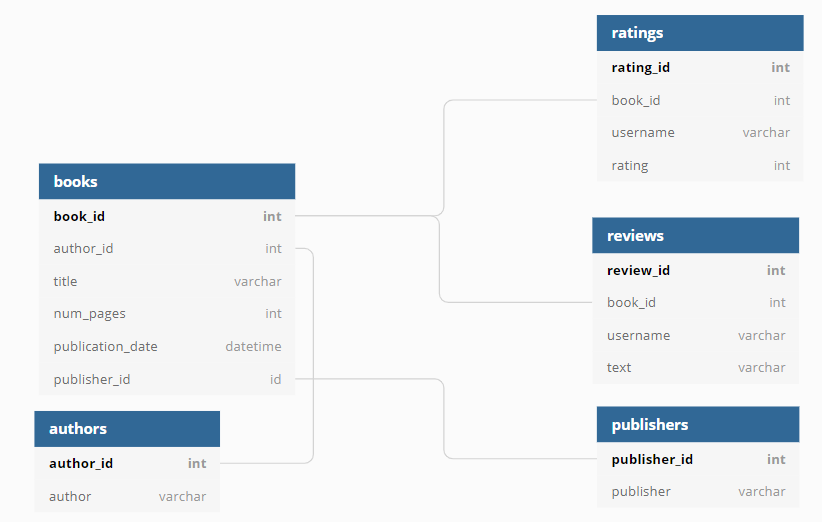

# Task


- Find the number of books released after January 1, 2000.


- Find the number of user reviews and the average rating for each book.


- Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).


- Identify the author with the highest average book rating: look only at books with at least 50 ratings.


- Find the average number of text reviews among users who rated more than 50 books.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👍 Ron, thank you for your additional job with project introduction!
</div>

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [2]:
#df= pd.read_csv('CA.pem', sep='\t')

In [3]:
#df.head()

In [4]:


db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [5]:
# Creating an SQL query.
query = ''' SELECT *
            FROM books
        '''

In [9]:
books = pd.io.sql.read_sql(query, con = engine, index_col = 'book_id')

In [10]:
books.head()

,author_id,title,num_pages,publication_date,publisher_id
book_id,,,,,
1,546,'Salem's Lot,594,2005-11-01,93
2,465,1 000 Places to See Before You Die,992,2003-05-22,336
3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
5,125,1776,386,2006-07-04,268


In [11]:
books.shape

(1000, 5)

In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   author_id         1000 non-null   int64 
 1   title             1000 non-null   object
 2   num_pages         1000 non-null   int64 
 3   publication_date  1000 non-null   object
 4   publisher_id      1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
books.describe(include='all')

,author_id,title,num_pages,publication_date,publisher_id
count,1000.000000,1000,1000.00000,1000,1000.000000
unique,NaN,999,NaN,618,NaN
top,NaN,Memoirs of a Geisha,NaN,2006-08-29,NaN
freq,NaN,2,NaN,10,NaN
mean,320.417000,NaN,389.11100,NaN,171.270000
std,181.620172,NaN,229.39014,NaN,99.082685
min,1.000000,NaN,14.00000,NaN,1.000000
25%,162.750000,NaN,249.00000,NaN,83.000000
50%,316.500000,NaN,352.00000,NaN,177.500000
75%,481.000000,NaN,453.00000,NaN,258.000000


Books table has 1000 rows and five columns.
There are 999 unique books, "Memoirs of a Geisha," presented twice in the data.
The mean number of pages in a book is 389.
There are 618 unique publication dates. The top date for publishing a book is 2004-06-01.

In [14]:
# Creating an SQL query.
query_authors = ''' SELECT *
            FROM authors
        '''

In [15]:
authors = pd.io.sql.read_sql(query_authors, con = engine, index_col = 'author_id')

In [16]:
authors.head()

,author
author_id,
1,A.S. Byatt
2,Aesop/Laura Harris/Laura Gibbs
3,Agatha Christie
4,Alan Brennert
5,Alan Moore/David Lloyd


In [17]:
authors.shape

(636, 1)

In [18]:
authors.describe()

,author
count,636
unique,636
top,Tucker Max
freq,1


In the authors, data er have one column with 636 rows, all of which are unique.

In [19]:
query_ratings = '''select *
                   From ratings
                '''

In [20]:
ratings = pd.io.sql.read_sql(query_ratings, con=engine, index_col='rating_id')

In [21]:
ratings.head()

,book_id,username,rating
rating_id,,,
1,1,ryanfranco,4
2,1,grantpatricia,2
3,1,brandtandrea,5
4,2,lorichen,3
5,2,mariokeller,2


In [22]:
ratings.shape

(6456, 3)

In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6456 entries, 1 to 6456
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   book_id   6456 non-null   int64 
 1   username  6456 non-null   object
 2   rating    6456 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 201.8+ KB


In [24]:
ratings.describe(include='all')

,book_id,username,rating
count,6456.000000,6456,6456.000000
unique,NaN,160,NaN
top,NaN,paul88,NaN
freq,NaN,56,NaN
mean,510.574195,NaN,3.928284
std,284.141636,NaN,0.943303
min,1.000000,NaN,1.000000
25%,291.000000,NaN,3.000000
50%,506.000000,NaN,4.000000
75%,750.000000,NaN,5.000000


We have a book_id column in the rating data, the username who rate the book, and the actual rating value.
There are 6456 rows and three columns.
There is 160 unique username that rate books from 6456 ratings.
The average rating is 4.

In [25]:
query_reviews = '''select * from reviews'''

In [26]:
reviews = pd.io.sql.read_sql(query_reviews, con=engine, index_col='review_id')

In [27]:
reviews.head()

,book_id,username,text
review_id,,,
1,1,brandtandrea,Mention society tell send professor analysis. ...
2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
4,3,johnsonamanda,Finally month interesting blue could nature cu...
5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [28]:
reviews.shape

(2793, 3)

In [29]:
reviews.describe(include='all')

,book_id,username,text
count,2793.000000,2793,2793
unique,NaN,160,2793
top,NaN,susan85,Standard process research model size. All busi...
freq,NaN,29,1
mean,504.693161,NaN,NaN
std,288.472931,NaN,NaN
min,1.000000,NaN,NaN
25%,259.000000,NaN,NaN
50%,505.000000,NaN,NaN
75%,753.000000,NaN,NaN


In the reviews data, we have 2793 rows and three columns.
The book id, the user who leaves a review, and the review text.
There are 160	unique reviewers from 2793 reviews.

In [30]:
query_publishers = '''select * from publishers'''

In [31]:
publishers = pd.io.sql.read_sql(query_publishers, con= engine, index_col='publisher_id')

In [32]:
publishers.head()

,publisher
publisher_id,
1,Ace
2,Ace Book
3,Ace Books
4,Ace Hardcover
5,Addison Wesley Publishing Company


In [33]:
publishers.shape

(340, 1)

In [34]:
publishers.describe()

,publisher
count,340
unique,340
top,Onyx
freq,1


In the publisher's table, we have 1 column and 340 rows.
The column represents the name of the publisher.
All rows on the data are unique publishers' names.

**Find the number of books released after January 1, 2000.**

In [35]:
# Creating an SQL query.
query_1 = ''' SELECT COUNT(DISTINCT title)
            FROM books
            WHERE publication_date > '2000-01-01'
        '''

In [36]:
c1 = pd.io.sql.read_sql(query_1, con = engine)

In [37]:
c1

,count
0,818


We have 818 books that were released after January 1, 2000.

**- Find the number of user reviews and the average rating for each book.**

In [44]:
# Creating an SQL query.

query_2 =''' SELECT b.title, COUNT(DISTINCT(re.username)), AVG(ra.rating)
    FROM books b
    LEFT JOIN ratings ra on ra.book_id = b.book_id
    LEFT JOIN reviews re on re.book_id = b.book_id
    GROUP BY b.title, b.book_id
'''

In [45]:
ratings1 = pd.io.sql.read_sql(query_2, con = engine, index_col = 'title')

In [46]:
ratings1.head()

,count,avg
title,,
'Salem's Lot,2,3.666667
1 000 Places to See Before You Die,1,2.500000
13 Little Blue Envelopes (Little Blue Envelope #1),3,4.666667
1491: New Revelations of the Americas Before Columbus,2,4.500000
1776,4,4.000000


**Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).**

In [47]:
# Creating an SQL query.

query_3 =''' SELECT publisher, Count(*)
            FROM books b 
            JOIN publishers p on p.publisher_id = b.publisher_id 
            WHERE num_pages > 50
            GROUP BY publisher
            ORDER BY 2 DESC LIMIT 1
'''

In [48]:
c3 = pd.io.sql.read_sql(query_3, con = engine, index_col = 'publisher')

In [49]:
c3

,count
publisher,
Penguin Books,42


Penguin Books is the publisher that released the most significant number of books.

**Identify the author with the highest average book rating (look only at books with at least 50 ratings).**

In [50]:
pd.io.sql.read_sql('''
WITH book_ratings AS (
SELECT authors.author,
       books.book_id,
       books.title,
       COUNT(rating_id) AS number_of_ratings,
       AVG(rating) AS avg_rating
FROM authors
JOIN books ON authors.author_id = books.author_id
JOIN ratings ON ratings.book_id = books.book_id  
GROUP BY books.book_id, books.title, authors.author
HAVING COUNT(rating_id) >= 50)

SELECT author,
       COUNT(book_id) as book_num,
       AVG(avg_rating)
FROM book_ratings
GROUP BY author
ORDER BY avg DESC

''', con = engine)

,author,book_num,avg
0,J.K. Rowling/Mary GrandPré,4,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,1,4.264151
2,J.R.R. Tolkien,2,4.258446
3,Louisa May Alcott,1,4.192308
4,Rick Riordan,1,4.080645
5,William Golding,1,3.901408
6,J.D. Salinger,1,3.825581
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,1,3.789474
8,William Shakespeare/Paul Werstine/Barbara A. M...,1,3.787879
9,Dan Brown,2,3.754540


**Find the average number of text reviews among users who rated more than 50 books.**

In [51]:
# Creating an SQL query.

query_5 ='''SELECT ROUND(AVG(cnt), 2) FROM (
            SELECT re.username, COUNT(*) cnt
            FROM reviews re
            JOIN (SELECT username
            FROM ratings
            GROUP BY username
            HAVING COUNT(*) > 50) x on x.username = re.username
            GROUP BY re.username) y
'''

In [52]:
c_7 = pd.io.sql.read_sql(query_5, con = engine)

In [53]:
c_7

,round
0,24.33


We find that the average number of text reviews among users who rated more than 50 books is 24.3

# Describe your conclusions for each of the tasks.

- On the first task, we find that after January 1, 2000, 818 books were released.


- On the second task, we find the number of user reviews and the average rating for each book.


- On the third task, Identify the publisher that has released the greatest number of books with more than 50 pages and found that Penguin Books was the winner with 42 books.


- on the fourth task, we Identify the author with the highest average book rating: "Diana Gabaldon."


- On the fifth task, we find that the average number of text reviews among users who rated more than 50 books is 24.3.

